In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:0

In [2]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
used_cars_df = pd.read_csv(io.BytesIO(uploaded["Used_cars.csv"]))
used_cars_df.head()

Saving Used_cars.csv to Used_cars.csv


,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [3]:
dimensions = used_cars_df.shape
head_data = used_cars_df.head()

dimensions, head_data

((14741, 12),
    Unnamed: 0    Brand   Model   Body            Color  Year     Fuel  \
 0        5337  Hyundai  Accent  Sedan            Black  2007  Benzine   
 1        5338  Hyundai  Accent  Sedan           Silver  2005  Benzine   
 2        5339  Hyundai  Accent  Sedan             Gray  1999  Benzine   
 3        5340  Hyundai  Accent  Sedan  Blue- Navy Blue  2009  Benzine   
 4        5341  Hyundai  Accent  Sedan           Silver  2000  Benzine   
 
          Kilometers          Engine Transmission  Price    Gov  
 0  140000 to 159999         1600 CC    Automatic  140.0   Giza  
 1  180000 to 199999  1000 - 1300 CC       Manual   78.0   Qena  
 2  140000 to 159999  1400 - 1500 CC       Manual   70.0   Giza  
 3  140000 to 159999         1600 CC    Automatic  150.0  Cairo  
 4    10000 to 19999  1000 - 1300 CC       Manual   75.0   Giza  )

In [4]:
# Check data types and missing values
data_info = used_cars_df.info()

# Calculate the number of missing values in each column
missing_values = used_cars_df.isnull().sum()

data_info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14741 non-null  int64  
 1   Brand         14741 non-null  object 
 2   Model         14741 non-null  object 
 3   Body          14741 non-null  object 
 4   Color         14741 non-null  object 
 5   Year          14741 non-null  int64  
 6   Fuel          14741 non-null  object 
 7   Kilometers    14741 non-null  object 
 8   Engine        14741 non-null  object 
 9   Transmission  14741 non-null  object 
 10  Price         14741 non-null  float64
 11  Gov           14741 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


(None,
 Unnamed: 0      0
 Brand           0
 Model           0
 Body            0
 Color           0
 Year            0
 Fuel            0
 Kilometers      0
 Engine          0
 Transmission    0
 Price           0
 Gov             0
 dtype: int64)

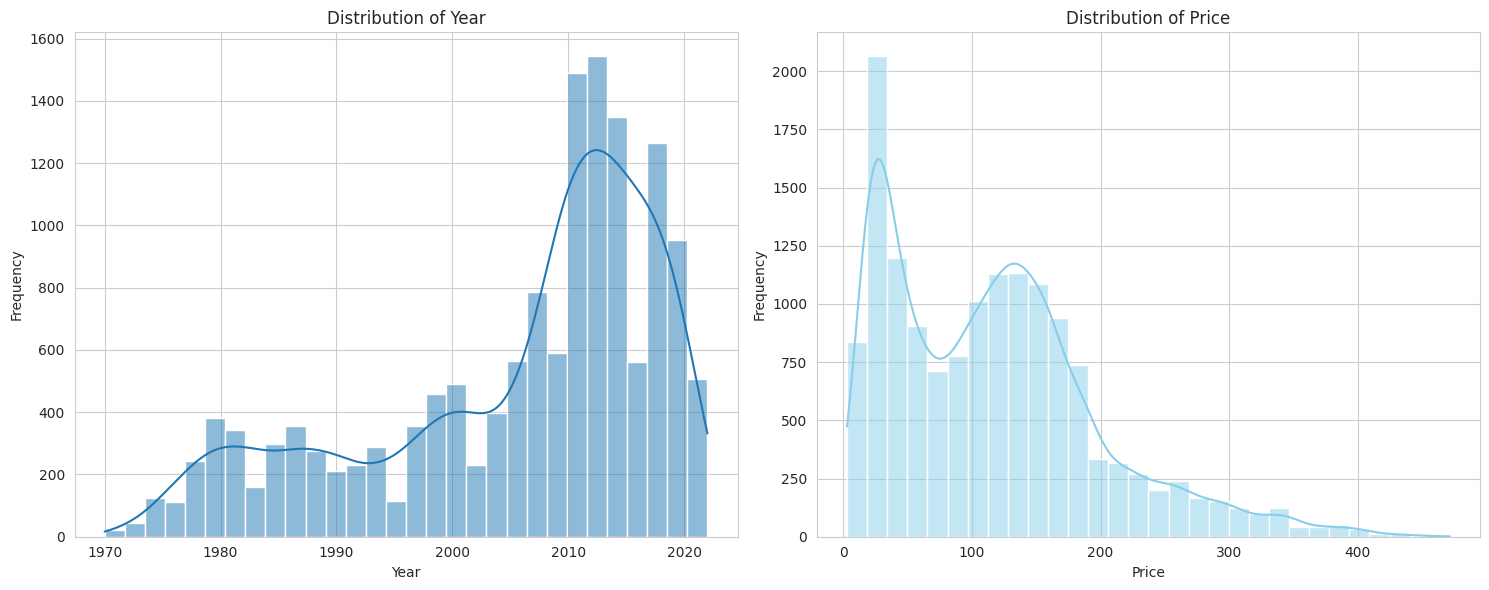

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(15, 6))

# Plot histogram for Year
plt.subplot(1, 2, 1)
sns.histplot(used_cars_df['Year'], kde=True, bins=30)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Plot histogram for Price
plt.subplot(1, 2, 2)
sns.histplot(used_cars_df['Price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

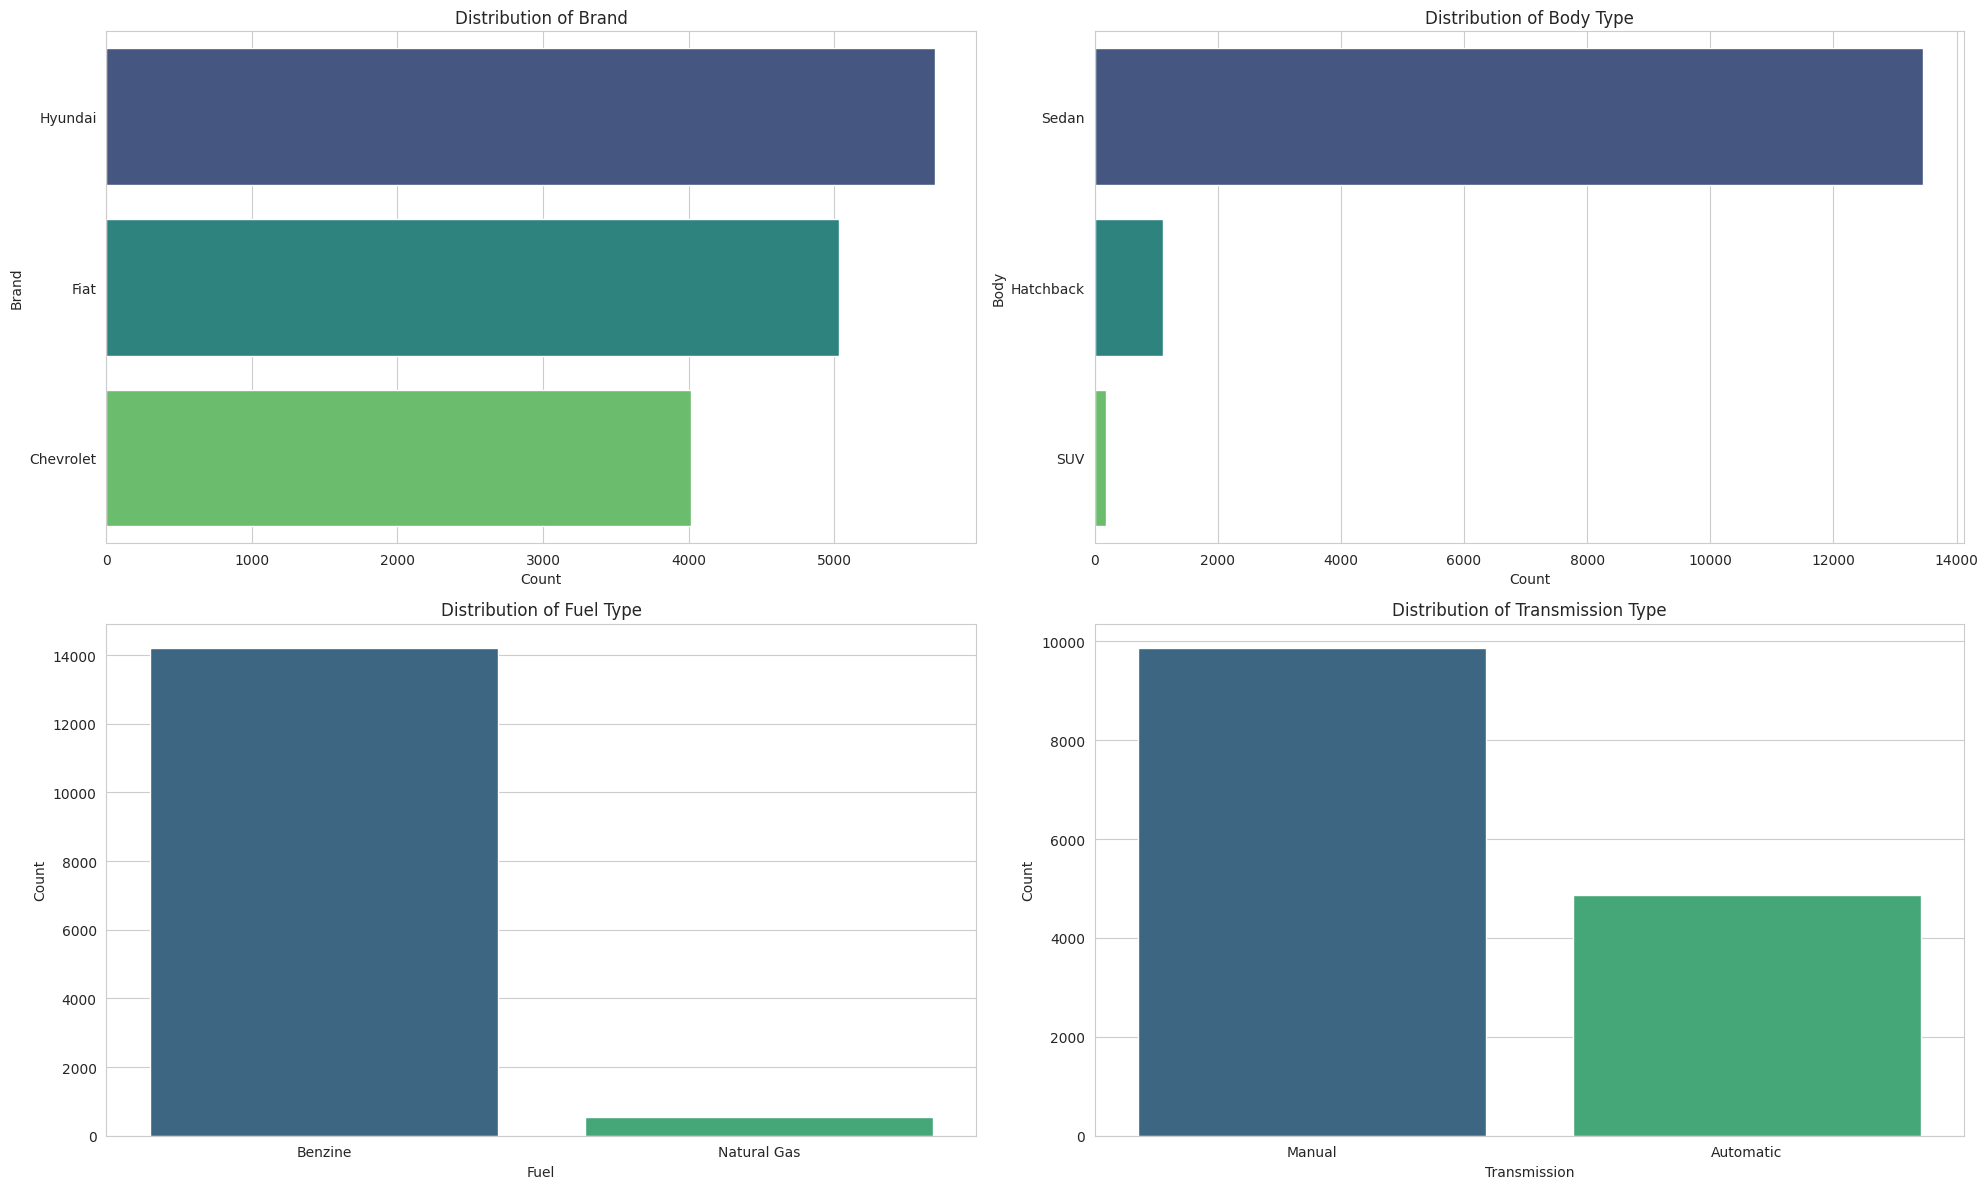

In [6]:
# Initialize the figure
plt.figure(figsize=(20, 12))

# Plot bar chart for Brand
plt.subplot(2, 2, 1)
sns.countplot(y='Brand', data=used_cars_df, order=used_cars_df['Brand'].value_counts().index, palette="viridis")
plt.title('Distribution of Brand')
plt.xlabel('Count')

# Plot bar chart for Body
plt.subplot(2, 2, 2)
sns.countplot(y='Body', data=used_cars_df, order=used_cars_df['Body'].value_counts().index, palette="viridis")
plt.title('Distribution of Body Type')
plt.xlabel('Count')

# Plot bar chart for Fuel
plt.subplot(2, 2, 3)
sns.countplot(x='Fuel', data=used_cars_df, order=used_cars_df['Fuel'].value_counts().index, palette="viridis")
plt.title('Distribution of Fuel Type')
plt.ylabel('Count')

# Plot bar chart for Transmission
plt.subplot(2, 2, 4)
sns.countplot(x='Transmission', data=used_cars_df, order=used_cars_df['Transmission'].value_counts().index, palette="viridis")
plt.title('Distribution of Transmission Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [7]:
# Check unique values in the 'Kilometers' column
unique_kilometers = used_cars_df['Kilometers'].unique()

unique_kilometers

array(['140000 to 159999', '180000 to 199999', '10000 to 19999',
       'More than 200000', '90000 to 99999', '100000 to 119999',
       '160000 to 179999', '120000 to 139999', '0 to 9999',
       '20000 to 29999', '30000 to 39999', '80000 to 89999',
       '60000 to 69999', '70000 to 79999', '40000 to 49999',
       '50000 to 59999'], dtype=object)

In [8]:
# Modify the function to handle the "X to Y" format correctly
def range_to_avg(value):
    if 'More than' in value:
        return 250000  # Representative value for "More than 200000"
    elif 'to' in value:
        values = value.split('to')
        return (float(values[0].replace(',', '').strip()) + float(values[1].replace('CC', '').replace(',', '').strip())) / 2
    else:
        return float(value.replace('CC', '').replace(',', '').strip())

# Convert 'Kilometers' column into average values again
used_cars_df['Kilometers'] = used_cars_df['Kilometers'].apply(lambda x: range_to_avg(x))

# Preview the transformed dataset
used_cars_df.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,149999.5,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,189999.5,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,149999.5,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,149999.5,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,14999.5,1000 - 1300 CC,Manual,75.0,Giza


In [9]:
# Modify the function to handle the "X - Y" format correctly
def range_to_avg(value):
    if 'More than' in value:
        return 250000  # Representative value for "More than 200000"
    elif 'to' in value:
        values = value.split('to')
        return (float(values[0].replace(',', '').strip()) + float(values[1].replace('CC', '').replace(',', '').strip())) / 2
    elif '-' in value:
        values = value.split('-')
        return (float(values[0].replace('CC', '').replace(',', '').strip()) + float(values[1].replace('CC', '').replace(',', '').strip())) / 2
    else:
        return float(value.replace('CC', '').replace(',', '').strip())

# Convert 'Engine' column into average values again
used_cars_df['Engine'] = used_cars_df['Engine'].apply(lambda x: range_to_avg(x))

# Preview the transformed dataset
used_cars_df.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,149999.5,1600.0,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,189999.5,1150.0,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,149999.5,1450.0,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,149999.5,1600.0,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,14999.5,1150.0,Manual,75.0,Giza


In [10]:
# Count the number of unique values in each categorical column
unique_counts = used_cars_df.select_dtypes(include=['object']).nunique()

unique_counts


Brand            3
Model           18
Body             3
Color           14
Fuel             2
Transmission     2
Gov             26
dtype: int64

In [11]:
# Apply one-hot encoding to selected columns
encoded_df = pd.get_dummies(used_cars_df, columns=['Brand', 'Body', 'Fuel', 'Transmission'], drop_first=True)

# Preview the transformed dataset
encoded_df.head()

,Unnamed: 0,Model,Color,Year,Kilometers,Engine,Price,Gov,Brand_Fiat,Brand_Hyundai,Body_SUV,Body_Sedan,Fuel_Natural Gas,Transmission_Manual
0,5337,Accent,Black,2007,149999.5,1600.0,140.0,Giza,0,1,0,1,0,0
1,5338,Accent,Silver,2005,189999.5,1150.0,78.0,Qena,0,1,0,1,0,1
2,5339,Accent,Gray,1999,149999.5,1450.0,70.0,Giza,0,1,0,1,0,1
3,5340,Accent,Blue- Navy Blue,2009,149999.5,1600.0,150.0,Cairo,0,1,0,1,0,0
4,5341,Accent,Silver,2000,14999.5,1150.0,75.0,Giza,0,1,0,1,0,1


In [12]:
# Frequency encoding for 'Model' and 'Gov' columns
model_freq = encoded_df['Model'].value_counts(normalize=True)
gov_freq = encoded_df['Gov'].value_counts(normalize=True)

encoded_df['Model'] = encoded_df['Model'].map(model_freq)
encoded_df['Gov'] = encoded_df['Gov'].map(gov_freq)

# One-hot encoding for 'Color' column
encoded_df = pd.get_dummies(encoded_df, columns=['Color'], drop_first=True)

# Preview the transformed dataset
encoded_df.head()

,Unnamed: 0,Model,Year,Kilometers,Engine,Price,Gov,Brand_Fiat,Brand_Hyundai,Body_SUV,...,Color_Burgundy,Color_Gold,Color_Gray,Color_Green,Color_Orange,Color_Other Color,Color_Red,Color_Silver,Color_White,Color_Yellow
0,5337,0.08629,2007,149999.5,1600.0,140.0,0.163625,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5338,0.08629,2005,189999.5,1150.0,78.0,0.006784,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,5339,0.08629,1999,149999.5,1450.0,70.0,0.163625,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,5340,0.08629,2009,149999.5,1600.0,150.0,0.302422,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5341,0.08629,2000,14999.5,1150.0,75.0,0.163625,0,1,0,...,0,0,0,0,0,0,0,1,0,0


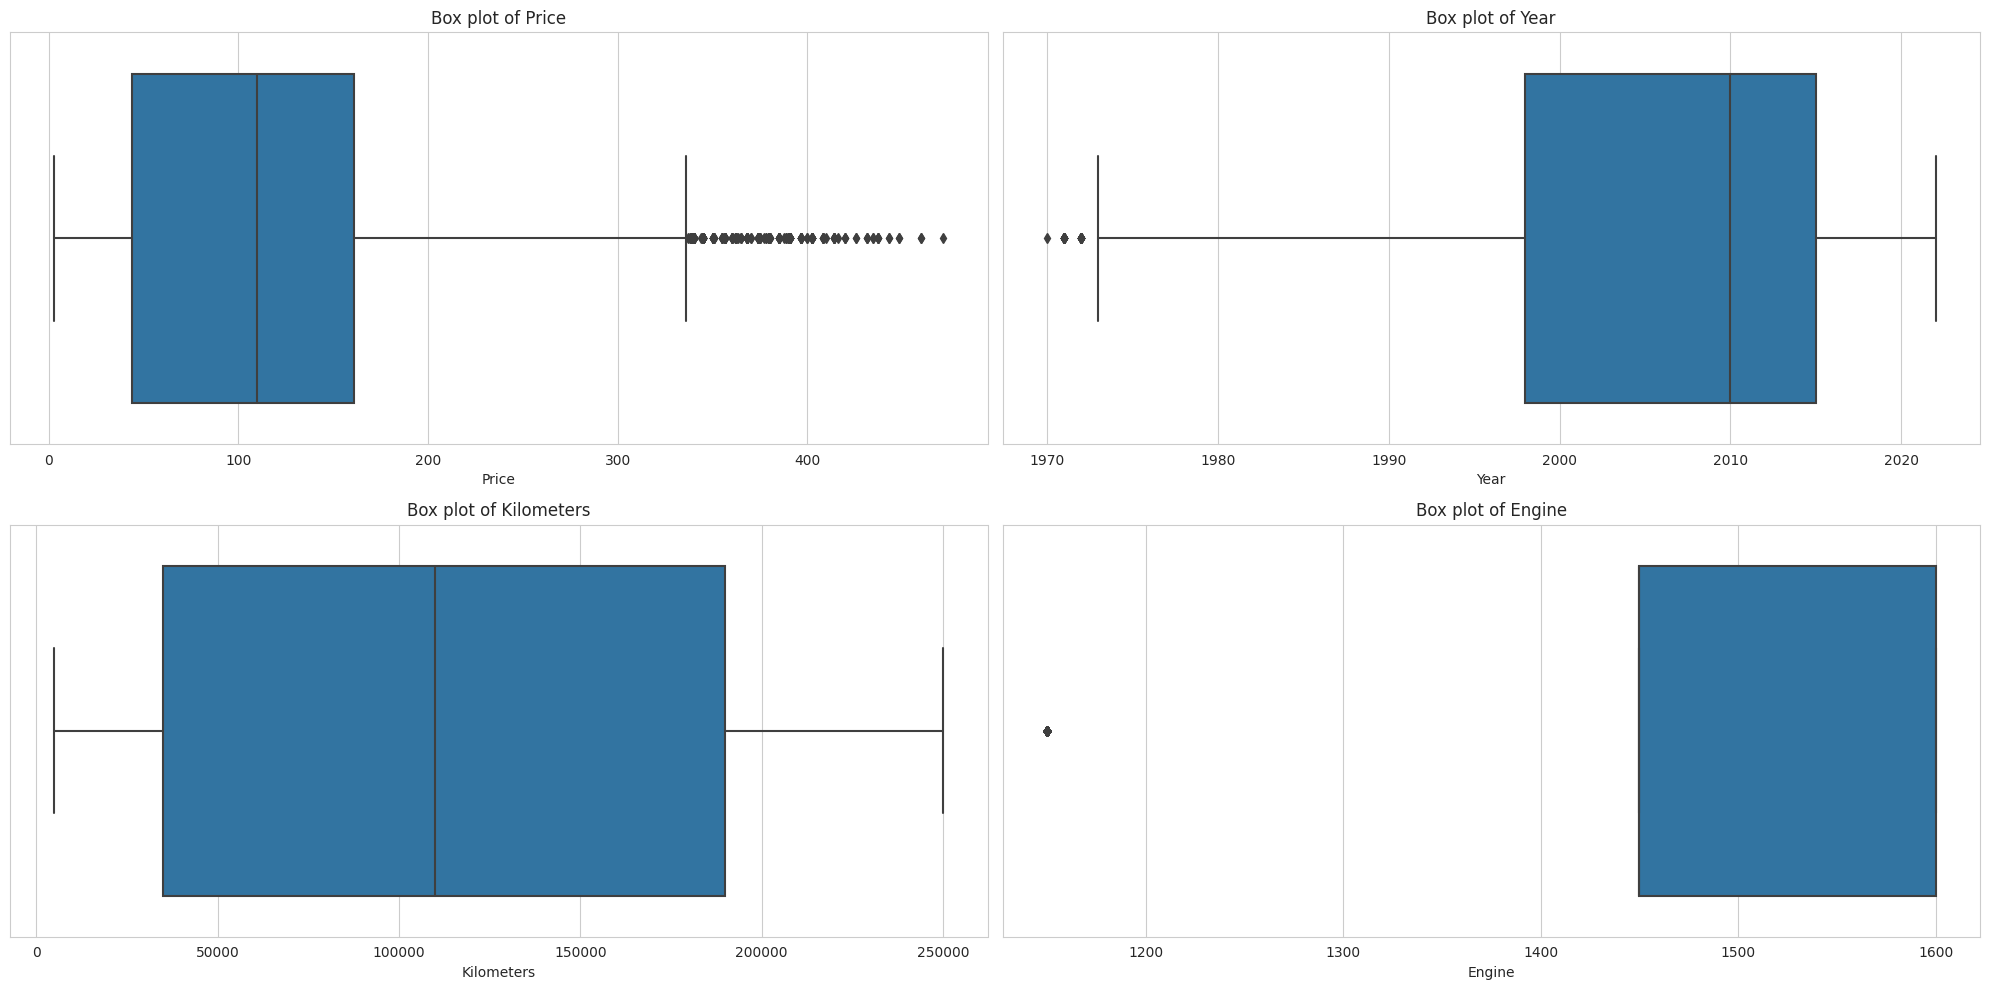

In [13]:
# Initialize the figure
plt.figure(figsize=(20, 10))

# Box plot for 'Price'
plt.subplot(2, 2, 1)
sns.boxplot(x=encoded_df['Price'])
plt.title('Box plot of Price')

# Box plot for 'Year'
plt.subplot(2, 2, 2)
sns.boxplot(x=encoded_df['Year'])
plt.title('Box plot of Year')

# Box plot for 'Kilometers'
plt.subplot(2, 2, 3)
sns.boxplot(x=encoded_df['Kilometers'])
plt.title('Box plot of Kilometers')

# Box plot for 'Engine'
plt.subplot(2, 2, 4)
sns.boxplot(x=encoded_df['Engine'])
plt.title('Box plot of Engine')

plt.tight_layout()
plt.show()


In [14]:
# Function to cap outliers using the IQR method
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    return data

# Cap outliers for 'Price' and 'Kilometers'
encoded_df = cap_outliers(encoded_df, 'Price')
encoded_df = cap_outliers(encoded_df, 'Kilometers')

# Preview the dataset after capping
encoded_df.describe()[['Price', 'Kilometers']]


,Price,Kilometers
count,14741.000000,14741.000000
mean,115.910864,117235.864731
std,80.114883,82390.871293
min,3.000000,4999.500000
25%,43.700000,34999.500000
50%,110.000000,109999.500000
75%,161.000000,189999.500000
max,336.950000,250000.000000


In [15]:
# Calculate correlation of each feature with 'Price'
correlation_with_price = encoded_df.corr()['Price'].sort_values(ascending=False)

correlation_with_price

Price                    1.000000
Year                     0.784680
Engine                   0.607780
Brand_Hyundai            0.378422
Color_Black              0.171855
Color_Gray               0.169383
Unnamed: 0               0.157290
Color_Brown              0.124329
Color_Silver             0.111540
Body_SUV                 0.082601
Gov                      0.026144
Color_Gold               0.023950
Fuel_Natural Gas         0.006407
Color_Other Color        0.004162
Color_Burgundy           0.001541
Body_Sedan              -0.016127
Color_Blue- Navy Blue   -0.020545
Color_Orange            -0.040957
Color_Yellow            -0.073137
Color_Red               -0.127680
Color_Green             -0.127923
Color_White             -0.221723
Kilometers              -0.234195
Model                   -0.330394
Brand_Fiat              -0.595534
Transmission_Manual     -0.701850
Name: Price, dtype: float64

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Separate the features and target variable
X = encoded_df.drop('Price', axis=1)
y = encoded_df['Price']

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances


Year                     0.593377
Transmission_Manual      0.208807
Brand_Fiat               0.055475
Model                    0.043968
Unnamed: 0               0.033117
Kilometers               0.013883
Gov                      0.011909
Brand_Hyundai            0.007743
Engine                   0.005742
Color_White              0.004799
Color_Orange             0.002598
Color_Other Color        0.002487
Color_Black              0.002019
Color_Silver             0.001807
Color_Gray               0.001803
Body_Sedan               0.001776
Color_Red                0.001363
Color_Blue- Navy Blue    0.001308
Body_SUV                 0.001233
Fuel_Natural Gas         0.001098
Color_Burgundy           0.000878
Color_Green              0.000817
Color_Gold               0.000811
Color_Brown              0.000697
Color_Yellow             0.000482
dtype: float64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

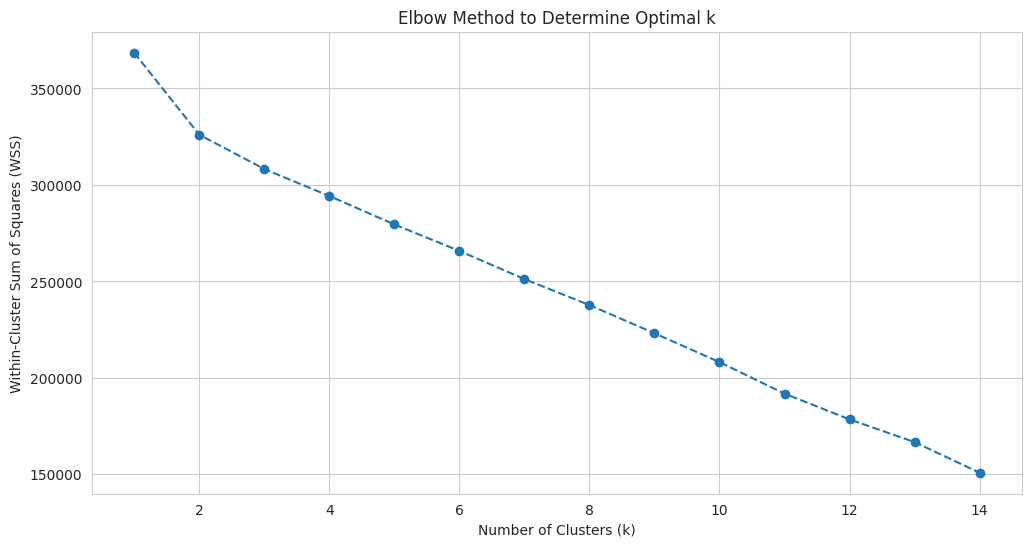

In [17]:
from sklearn.cluster import KMeans

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k
wss = []
cluster_range = range(1, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

# Plot the WSS values to determine the elbow
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, wss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


<ipython-input-25-4264ef3cb9ec>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=encoded_df, x='Year', y='Price', palette='viridis', alpha=0.6)


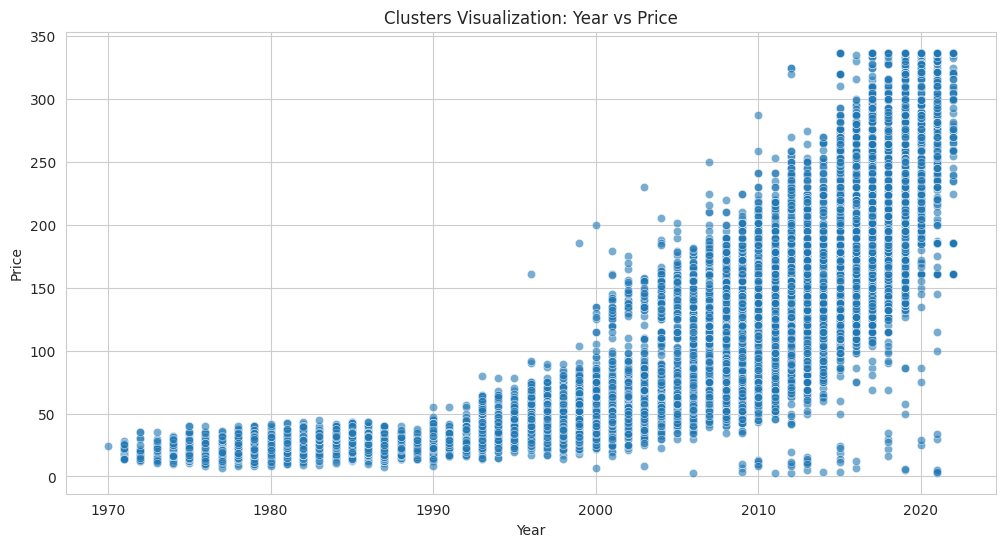

In [25]:
# Visualizing the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=encoded_df, x='Year', y='Price', palette='viridis', alpha=0.6)
plt.title('Clusters Visualization: Year vs Price')
plt.show()


In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11792, 25), (2949, 25), (11792,), (2949,))

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate and display metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2


(1413.9094023336777, 37.60198668067523, 27.51371182001249, 0.7838064853921424)

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Ridge Regression model
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Calculate and display metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_ridge, rmse_ridge, mae_ridge, r2_ridge


(1413.9052555509047, 37.60193154016034, 27.512213998563112, 0.7838071194550749)

In [43]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Calculate and display metrics for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_lasso, rmse_lasso, mae_lasso, r2_lasso


(1447.2424690687367, 38.04264014324895, 27.19707589695873, 0.7787096999558079)

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate and display metrics for Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, rmse_rf, mae_rf, r2_rf


(523.3441335749408, 22.876715970063113, 13.096386232621223, 0.9199781772437291)

In [44]:
# Organize model metrics into a DataFrame
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regression']
mse_values = [mse, mse_ridge, mse_lasso, mse_rf]
rmse_values = [rmse, rmse_ridge, rmse_lasso, rmse_rf]
mae_values = [mae, mae_ridge, mae_lasso, mae_rf]
r2_values = [r2, r2_ridge, r2_lasso, r2_rf]

model_evaluation_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R2': r2_values
})

model_evaluation_df.sort_values(by='R2', ascending=False)


,Model,MSE,RMSE,MAE,R2
3,Random Forest Regression,523.344134,22.876716,13.096386,0.919978
1,Ridge Regression,1413.905256,37.601932,27.512214,0.783807
0,Linear Regression,1413.909402,37.601987,27.513712,0.783806
2,Lasso Regression,1447.242469,38.042640,27.197076,0.778710


In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search on the hyperparameters
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # limited iterations for computational efficiency
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=1)